###### importing libraries as per required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import plot_confusion_matrix, roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

###### Loading the data file

In [2]:
df = pd.read_csv('SAKI Exercise 1 - Transaction Classification - Data Set.csv', error_bad_lines=False, sep=';')
df

,Unnamed: 0,Auftragskonto,Buchungstag,Valutadatum,Buchungstext,Verwendungszweck,Beguenstigter/Zahlungspflichtiger,Kontonummer,BLZ,Betrag,Waehrung,label
0,0,89990201.0,28.07.2016,28.07.2016,Lohn / Gehalt,Gehalt Adorsys GmbH & Co. KG End-To-End-Ref.: ...,Adorsys GmbH & Co. KG,7807800780,25190001,2000.00,EUR,income
1,1,89990201.0,27.07.2016,27.07.2016,Miete,Byladem1Sbt De12773501123456789889 Miete Beuth...,Georg Tasche,DE31251900019123456780,VOHADE2HXXX,-670.00,EUR,living
2,2,89990201.0,21.07.2016,21.07.2016,Bargeld,"21.07/16.34Uhr Nuernberg All Eur 70,00 Geb.Eur...",Bargeld,9999900780,25190001,-70.00,EUR,private
3,3,89990201.0,20.07.2016,20.07.2016,Lebensmittel / Getraenke,2831 Edeka Neubauer Nuernb.//Nuernb 2016-07-20...,Kartenzahlung,9736000780,25190001,-73.21,EUR,standardOfLiving
4,4,89990201.0,18.07.2016,18.07.2016,Spontanausgabe,Amazon,neue Playstation,9988776655,25125100,-363,EUR,leisure
...,...,...,...,...,...,...,...,...,...,...,...,...
204,204,NaN,15.02.2016,15.02.2016,Mieteinnahmen,Mietzuschuss End-To-End-Ref.: Notprovided Kund...,Isabel Anna,DE31251900019736000780,VOHADE2HXXX,200.00,EUR,finance
205,205,NaN,02.02.2016,02.02.2016,Geldanlage,Ccbade31Xxx De71310108339900123456 Sparen End-...,Michael Koffer,DE69790800529736000780,DRESDEFF790,-300.00,EUR,finance
206,206,NaN,28.01.2016,28.01.2016,Lohn / Gehalt,Gehalt Adorsys GmbH & Co. KG End-To-End-Ref.: ...,Adorsys GmbH & Co. KG,7807800780,25190001,2000.00,EUR,income
207,207,NaN,28.01.2016,28.01.2016,Geldanlage,Ssknde77Xxx De41760501010012345675 Einmalspare...,Christina Jung,DE31251900019736333780,VOHADE2HXXX,-4000.00,EUR,finance


###### Droping the Index Column

In [3]:
df.drop(['Unnamed: 0'],axis=1)

,Auftragskonto,Buchungstag,Valutadatum,Buchungstext,Verwendungszweck,Beguenstigter/Zahlungspflichtiger,Kontonummer,BLZ,Betrag,Waehrung,label
0,89990201.0,28.07.2016,28.07.2016,Lohn / Gehalt,Gehalt Adorsys GmbH & Co. KG End-To-End-Ref.: ...,Adorsys GmbH & Co. KG,7807800780,25190001,2000.00,EUR,income
1,89990201.0,27.07.2016,27.07.2016,Miete,Byladem1Sbt De12773501123456789889 Miete Beuth...,Georg Tasche,DE31251900019123456780,VOHADE2HXXX,-670.00,EUR,living
2,89990201.0,21.07.2016,21.07.2016,Bargeld,"21.07/16.34Uhr Nuernberg All Eur 70,00 Geb.Eur...",Bargeld,9999900780,25190001,-70.00,EUR,private
3,89990201.0,20.07.2016,20.07.2016,Lebensmittel / Getraenke,2831 Edeka Neubauer Nuernb.//Nuernb 2016-07-20...,Kartenzahlung,9736000780,25190001,-73.21,EUR,standardOfLiving
4,89990201.0,18.07.2016,18.07.2016,Spontanausgabe,Amazon,neue Playstation,9988776655,25125100,-363,EUR,leisure
...,...,...,...,...,...,...,...,...,...,...,...
204,NaN,15.02.2016,15.02.2016,Mieteinnahmen,Mietzuschuss End-To-End-Ref.: Notprovided Kund...,Isabel Anna,DE31251900019736000780,VOHADE2HXXX,200.00,EUR,finance
205,NaN,02.02.2016,02.02.2016,Geldanlage,Ccbade31Xxx De71310108339900123456 Sparen End-...,Michael Koffer,DE69790800529736000780,DRESDEFF790,-300.00,EUR,finance
206,NaN,28.01.2016,28.01.2016,Lohn / Gehalt,Gehalt Adorsys GmbH & Co. KG End-To-End-Ref.: ...,Adorsys GmbH & Co. KG,7807800780,25190001,2000.00,EUR,income
207,NaN,28.01.2016,28.01.2016,Geldanlage,Ssknde77Xxx De41760501010012345675 Einmalspare...,Christina Jung,DE31251900019736333780,VOHADE2HXXX,-4000.00,EUR,finance


###### Checking number and location of all the NaN values in the dataframe

In [4]:
count_nan = df.isnull().sum()
print ('Count of NaN: ' + str(count_nan))

Count of NaN: Unnamed: 0                            0
Auftragskonto                        41
Buchungstag                           0
Valutadatum                           0
Buchungstext                          0
Verwendungszweck                      0
Beguenstigter/Zahlungspflichtiger     0
Kontonummer                           1
BLZ                                   1
Betrag                                0
Waehrung                              0
label                                 0
dtype: int64


##### Replacing the NaN values in Auftragskonto column to the mean of the column

In [5]:
df['Auftragskonto'].fillna((df['Auftragskonto'].mean()), inplace=True)

##### Replacing the NaN values in Kotonummer column to zero

In [6]:
df['Kontonummer'] = df['Kontonummer'].fillna(0)

##### Replacing the NaN values in BLZ column to zero

In [7]:
df['BLZ'] = df['BLZ'].fillna(0)

##### Rechecking the Number of NaN Values remaining

In [8]:
count_nan = df.isnull().sum()
print ('Count of NaN: ' + str(count_nan))

Count of NaN: Unnamed: 0                           0
Auftragskonto                        0
Buchungstag                          0
Valutadatum                          0
Buchungstext                         0
Verwendungszweck                     0
Beguenstigter/Zahlungspflichtiger    0
Kontonummer                          0
BLZ                                  0
Betrag                               0
Waehrung                             0
label                                0
dtype: int64


##### Checking the data types of all the columns

In [9]:
print(df.dtypes)

Unnamed: 0                             int64
Auftragskonto                        float64
Buchungstag                           object
Valutadatum                           object
Buchungstext                          object
Verwendungszweck                      object
Beguenstigter/Zahlungspflichtiger     object
Kontonummer                           object
BLZ                                   object
Betrag                                object
Waehrung                              object
label                                 object
dtype: object


##### Selecting required columns from the data relevant to our task

In [10]:
X = df[['Buchungstext','Beguenstigter/Zahlungspflichtiger','Verwendungszweck','Kontonummer','BLZ','Betrag']]
print(X.head)

<bound method NDFrame.head of                           Buchungstext Beguenstigter/Zahlungspflichtiger  \
0                        Lohn / Gehalt             Adorsys GmbH & Co. KG   
1                                Miete                      Georg Tasche   
2                              Bargeld                           Bargeld   
3             Lebensmittel / Getraenke                     Kartenzahlung   
4                       Spontanausgabe                  neue Playstation   
..                                 ...                               ...   
204                      Mieteinnahmen                       Isabel Anna   
205                         Geldanlage                    Michael Koffer   
206                      Lohn / Gehalt             Adorsys GmbH & Co. KG   
207                         Geldanlage                    Christina Jung   
208  Lastschrift (Einzugsermächtigung)                               Vag   

                                      Verwendungszweck  \

In [11]:
Y= df['label']
print(Y.head)

<bound method NDFrame.head of 0                income
1                living
2               private
3      standardOfLiving
4               leisure
             ...       
204             finance
205             finance
206              income
207             finance
208             leisure
Name: label, Length: 209, dtype: object>


##### Splitting our data set into training and testing data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state = 0)

##### Checking the shape of our split data

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(167, 6)
(42, 6)
(167,)
(42,)


In [14]:
print(y_train.astype('category'))

104    leisure
141    leisure
4      leisure
74     leisure
136    leisure
        ...   
67     private
192    finance
117     living
47     finance
172    finance
Name: label, Length: 167, dtype: category
Categories (6, object): ['finance', 'income', 'leisure', 'living', 'private', 'standardOfLiving']


In [15]:
print(X_train['Buchungstext'].shape)

(167,)


##### We build a vocabulary of known words in the column of Buchungstext and convert to vector form

In [16]:
count_vect1 = CountVectorizer()
fit_vect1 = count_vect1.fit(X_train['Buchungstext'])

vectorized_Buchungstext = fit_vect1.fit_transform(X_train['Buchungstext']).toarray()
vectorized_Buchungstext =pd.DataFrame(vectorized_Buchungstext)

features1 = count_vect1.get_feature_names()
print(features1)

['ausland', 'bargeld', 'belastung', 'dauerauftrag', 'drogerie', 'einzugsermächtigung', 'euro', 'euroscheck', 'gaa', 'gehalt', 'geldanlage', 'getraenke', 'lastschrift', 'lebensmittel', 'lohn', 'miete', 'mieteinnahmen', 'rente', 'spontanausgabe', 'überweisung']


##### We build a vocabulary of known words in the column of Beguenstigter/Zahlungspflichtiger and convert to vector form

In [17]:
count_vect2 = CountVectorizer()
fit_vect2 = count_vect2.fit(X_train['Beguenstigter/Zahlungspflichtiger'])
vectorized_Beguenstigter = fit_vect2.fit_transform(X_train['Beguenstigter/Zahlungspflichtiger']).toarray()
vectorized_Beguenstigter =pd.DataFrame(vectorized_Beguenstigter)

features2 = count_vect2.get_feature_names()

##### We build a vocabulary of known words in the column of Verwendungszweck and convert to vector form

In [18]:
count_vect3 = CountVectorizer()
fit_vect3 = count_vect3.fit(X_train['Verwendungszweck'])
vectorized_Verwendungszweck = fit_vect3.fit_transform(X_train['Verwendungszweck']).toarray()
vectorized_Verwendungszweck =pd.DataFrame(vectorized_Verwendungszweck)

features3 = count_vect3.get_feature_names()

##### We build a vocabulary of known data in the column of Kontonummer and convert to vector form

In [19]:
count_vect4 = CountVectorizer(lowercase=False)
fit_vect4 = count_vect4.fit(X_train['Kontonummer'].apply(str))
vectorized_Kontonummer = fit_vect4.fit_transform(X_train['Kontonummer'].apply(str)).toarray()
vectorized_Kontonummer =pd.DataFrame(vectorized_Kontonummer)
print(vectorized_Kontonummer.shape)

features4 = count_vect4.get_feature_names()

(167, 48)


##### We concatenate all the vocabulary buit

In [20]:
Vectorized_X_train = pd.concat([vectorized_Buchungstext, vectorized_Beguenstigter, vectorized_Verwendungszweck, vectorized_Kontonummer], axis = 1)
Vectorized_X_train.shape

(167, 464)

##### Transforming the test data to fit the vector form

In [21]:
testBuchungstext = fit_vect1.transform(X_test['Buchungstext']).toarray()
testBuchungstext =pd.DataFrame(testBuchungstext)
print(testBuchungstext.shape)

testBeguenstigter = fit_vect2.transform(X_test['Beguenstigter/Zahlungspflichtiger']).toarray()
testBeguenstigter =pd.DataFrame(testBeguenstigter)
print(testBeguenstigter.shape)

testVerwendungszweck = fit_vect3.transform(X_test['Verwendungszweck']).toarray()
testVerwendungszweck =pd.DataFrame(testVerwendungszweck)
print(testVerwendungszweck.shape)


testKontonummer = fit_vect4.transform(X_test['Kontonummer'].apply(str)).toarray()
testKontonummer =pd.DataFrame(testKontonummer)
print(testKontonummer.shape)

(42, 20)
(42, 97)
(42, 299)
(42, 48)


##### We concatenate all the vocabulary in the test data

In [22]:
Vectorized_X_test = pd.concat([testBuchungstext, testBeguenstigter, testVerwendungszweck, testKontonummer], axis = 1)
Vectorized_X_test.shape

print(Vectorized_X_train.shape)
print(y_train.shape)

(167, 464)
(167,)


##### Applying Gaussian Naive Bayes Model

In [23]:
model = GaussianNB()
model.fit(Vectorized_X_train, y_train)
y_pred = model.predict(Vectorized_X_test)
print(y_pred)

['finance' 'leisure' 'finance' 'finance' 'finance' 'living' 'leisure'
 'leisure' 'living' 'leisure' 'finance' 'leisure' 'standardOfLiving'
 'living' 'leisure' 'leisure' 'finance' 'standardOfLiving' 'private'
 'standardOfLiving' 'income' 'standardOfLiving' 'standardOfLiving'
 'leisure' 'leisure' 'leisure' 'leisure' 'living' 'leisure'
 'standardOfLiving' 'standardOfLiving' 'leisure' 'leisure' 'leisure'
 'standardOfLiving' 'standardOfLiving' 'standardOfLiving' 'living'
 'standardOfLiving' 'leisure' 'standardOfLiving' 'living']


##### Checking for the Accuracy of the model

In [24]:
print('Accuracy score : ',accuracy_score(y_test, y_pred))
print('Precision score : ',precision_score(y_test, y_pred, average='weighted'))
print('recall_score : ',recall_score(y_test, y_pred, average='weighted'))
print('F1 score:',f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

Accuracy score :  0.9523809523809523
Precision score :  0.9801587301587302
recall_score :  0.9523809523809523
F1 score: 0.9640914640914641
                  precision    recall  f1-score   support

         finance       1.00      0.86      0.92         7
          income       1.00      1.00      1.00         1
         leisure       1.00      0.94      0.97        17
          living       0.83      1.00      0.91         5
         private       0.00      0.00      0.00         0
standardOfLiving       1.00      1.00      1.00        12

        accuracy                           0.95        42
       macro avg       0.81      0.80      0.80        42
    weighted avg       0.98      0.95      0.96        42



C:\Users\Deepakraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Deepakraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


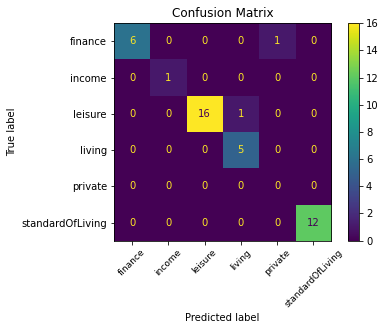

In [25]:
plot_confusion_matrix(model, Vectorized_X_test, y_test)
plt.tick_params(axis='x', which='major', labelsize=9)

plt.xticks(rotation=45)
plt.title('Confusion Matrix')
plt.show()